<a href="https://colab.research.google.com/github/aliceechen1206/Spanish-Wine-Price/blob/main/Spanish_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spanish Wine
- Alice Chen

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [118]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [119]:
df_ml = df.copy()

In [120]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [121]:
df.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


In [123]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Looking at the column for country and region i've decided to drop it as it would not be helpful to our model.

In [124]:
df.drop(columns=['region','country'], inplace=True)
df.head()

,winery,wine,year,rating,num_reviews,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,778.06,Ribera Del Duero Red,5.0,3.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   price        2048 non-null   float64
 6   type         1942 non-null   object 
 7   body         1777 non-null   float64
 8   acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 160.0+ KB


To fill in the missing values, I've decided for the year and type to be replaced with the most commonly used value and the body and acidity with the average.

In [126]:
df ['year'].mode()

0    2016
dtype: object

In [127]:
df['year'].fillna(2016, inplace=True)

In [128]:
df ['type'].mode()

0    Ribera Del Duero Red
dtype: object

In [129]:
df['type'].fillna('Ribera Del Duero Red', inplace=True)

In [130]:
df ['body'].median()

4.0

In [131]:
df['body'].fillna(4.0, inplace=True)

In [132]:
df ['acidity'].median()

3.0

In [133]:
df['acidity'].fillna(3.0, inplace=True)

In [134]:
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
price          0
type           0
body           0
acidity        0
dtype: int64

When I am trying to convert the year to an int it is stating it has a N.V value which I've decided to replace it with the most frequent value and drop the NaN

In [135]:
df['year']=df['year'].replace('N.V.',2016)

In [136]:
df['year'] = df['year'].astype(int)

In [137]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,2011.321289,4.401123,573.994629,135.242194,4.224609,2.931641
std,11.024656,0.147023,1376.153171,272.178316,0.614385,0.312912
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2010.000000,4.300000,58.000000,31.917947,4.000000,3.000000
50%,2015.000000,4.400000,141.000000,53.625000,4.000000,3.000000
75%,2017.000000,4.500000,485.500000,110.000000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


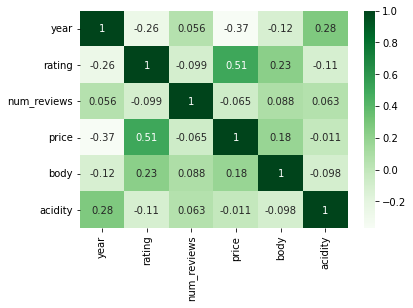

In [138]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Due to the high ratings the price and rating column has a positive correlation.

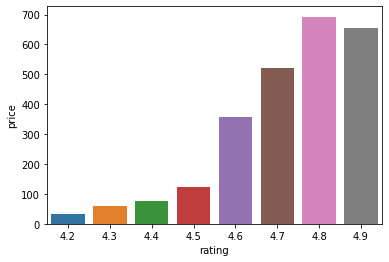

In [139]:
sns.barplot(x=df["rating"],y=df['price'], ci=None)

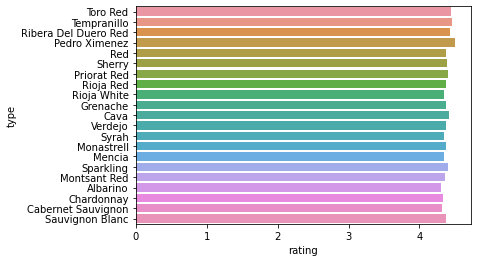

In [140]:
sns.barplot(x=df["rating"],y=df['type'], ci=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

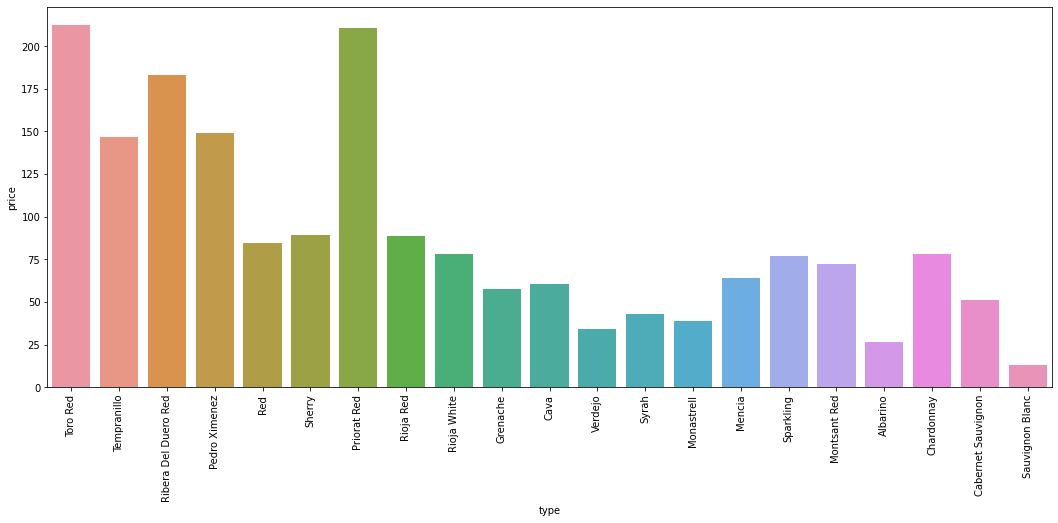

In [141]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.barplot(x=df["type"],y=df['price'],ci=None)
plt.xticks(rotation=90)

The barplot comparing the rating and price shows that the wine priced at 600 the average rating is 4.9. The second graph shows the types of wine compared to the price. The majority of the type of wine is the Toro Red and Priorat Red which the price is around $200.

**Model Performance**

In [142]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [143]:
df_ml.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [144]:
df_ml = df_ml.drop_duplicates()
df_ml.duplicated().sum()

0

In [145]:
df_ml.drop(columns=['region','country'], inplace=True)
df_ml.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,winery,wine,year,rating,num_reviews,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,778.06,Ribera Del Duero Red,5.0,3.0


In [146]:
y = df_ml['price']
X = df_ml.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [147]:
cat_feat = make_column_selector(dtype_include = 'object')
quant_feat = make_column_selector(dtype_include ='number')
encoder = OneHotEncoder(sparse= False, handle_unknown = 'ignore')
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [148]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [149]:
num_tuple = (num_processor, quant_feat)
cat_tuple = (cat_processor, cat_feat)

In [150]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder ='passthrough')

In [151]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [152]:
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

In [153]:
print('Train Evalutaion')
eval_regression(y_train, knn_train_pred)
print('Test Evaluation')
eval_regression(y_test, knn_test_pred)

Train Evalutaion
MAE 48.240883905196824,
 MSE 13558.168925270531,
 RMSE: 116.43955051987504,
 R^2: 0.8217290686712133 
Test Evaluation
MAE 61.790029031304286,
 MSE 29554.819246512285,
 RMSE: 171.91515130003023,
 R^2: 0.5644332494489346 


In [154]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [155]:
knn_params = {'kneighborsregressor__n_neighbors':[5,7,9,11],
              'kneighborsregressor__leaf_size':[15,20,30]}

In [156]:
knn_gs = GridSearchCV(knn_pipe, knn_params)

In [157]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [158]:
knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [159]:
print('Train Evalutaion')
eval_regression(y_train, knn_gs.predict(X_train))

Train Evalutaion
MAE 56.79107847345884,
 MSE 18597.42236037016,
 RMSE: 136.37236655704908,
 R^2: 0.7554699441516335 


In [160]:
print('Test Evaluation')
eval_regression(y_test, knn_gs.predict(X_test))

Test Evaluation
MAE 63.21284328161315,
 MSE 30534.846137816407,
 RMSE: 174.74222768929212,
 R^2: 0.5499900168601117 


In [161]:
lr = LinearRegression()

In [162]:
lr_pipe = make_pipeline(column_transformer, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [163]:
print('Train Evalutaion')
eval_regression(y_train, lr_pipe.predict(X_train))

Train Evalutaion
MAE 33.22828286478606,
 MSE 8146.582632013389,
 RMSE: 90.25842139110006,
 R^2: 0.8928838487733353 


In [164]:
print('Test Evaluation')
eval_regression(y_test, lr_pipe.predict(X_test))

Test Evaluation
MAE 34702243644647.973,
 MSE 5.67807223057115e+27,
 RMSE: 75352984218086.2,
 R^2: -8.36810893761758e+22 


**PCA Model**

In [165]:
pca_pipe = make_pipeline(column_transformer)
pca_df= pca_pipe.fit_transform(X_train)

In [166]:
pca = PCA(n_components=10)
pcs= pca.fit_transform(pca_df)

In [167]:
X_train.shape

(1536, 8)

In [168]:
transformer = make_pipeline(column_transformer, PCA(n_components=.95))

In [169]:
pca_linreg = LinearRegression()

In [170]:
pca_linreg_pipe = make_pipeline(transformer, pca_linreg)
pca_linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
             

In [171]:
print('Train Evalutaion')
eval_regression(y_train, pca_linreg_pipe.predict(X_train))

Train Evalutaion
MAE 53.68306682545373,
 MSE 13185.749779223845,
 RMSE: 114.82922005841476,
 R^2: 0.8266258588186403 


In [172]:
print('Test Evaluation')
eval_regression(y_test, pca_linreg_pipe.predict(X_test))

Test Evaluation
MAE 70.70823356922585,
 MSE 32393.81809164067,
 RMSE: 179.98282721315573,
 R^2: 0.5225932540330694 


In [173]:
pca_knn = KNeighborsRegressor()

In [174]:
pca_knn_pipe = make_pipeline(transformer, pca_knn)
pca_knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
             

In [175]:
print('Train Evalutaion')
eval_regression(y_train, pca_knn_pipe.predict(X_train))

Train Evalutaion
MAE 43.977710322381576,
 MSE 12953.978570655303,
 RMSE: 113.81554626084832,
 R^2: 0.8296733255845765 


In [176]:
print('Test Evaluation')
eval_regression(y_test, pca_knn_pipe.predict(X_test))

Test Evaluation
MAE 56.91590310437917,
 MSE 31656.655454023203,
 RMSE: 177.92317289780777,
 R^2: 0.5334572533022439 


In [177]:
pca_knn_gs = GridSearchCV(knn_pipe, knn_params)

In [178]:
pca_knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c8b9f46d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [179]:
pca_knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [180]:
print('Train Evalutaion')
eval_regression(y_train, pca_knn_gs.predict(X_train))

Train Evalutaion
MAE 56.79107847345884,
 MSE 18597.42236037016,
 RMSE: 136.37236655704908,
 R^2: 0.7554699441516335 


In [181]:
print('Test Evaluation')
eval_regression(y_test, pca_knn_gs.predict(X_test))

Test Evaluation
MAE 63.21284328161315,
 MSE 30534.846137816407,
 RMSE: 174.74222768929212,
 R^2: 0.5499900168601117 


PCA KNN model would be the better choice as it has a lower error rate at 177.92 and a 53% of accuracy. 

In [184]:
knn = KNeighborsRegressor()
knn_pipe.fit(X_train,y_train)  
knn_train_pred = knn_pipe.predict(X_train)
y_pred = knn_pipe.predict(X_test)

preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

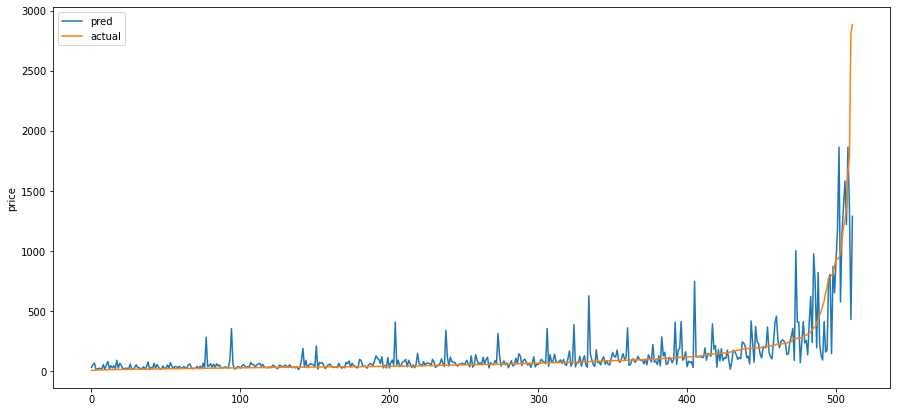

In [189]:
plt.figure(figsize=(15, 7))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.ylabel('price')
plt.show()

Model showed better results if the wines are priced under $500 